# Задание 1

Используем метод для вычисления силы взаимного притяжения Луны и Земли. Для простоты предположим, что плотности Земли и Луны не зависят от координат и возьмем их средние значения. Для проведения численного эксперимента нам понадобятся следующие физические величины:

$$
\begin{aligned}
& G=6.67 \cdot 10^{-11} \frac{\mathrm{H} \cdot \mathrm{м}^2}{\text { кг }}-\text { гравитационная постоянная; } \\
& m_1=6 \cdot 10^{24} \mathrm{ кг }-\text { масса Земли; } \\
& m_2=7.35 \cdot 10^{22} \text { кг }-\text { масса Луны; } \\
& r=384467000 \mathrm{ м}-\text { pacстояние между Луной и Землей; } \\
& \rho_1=5520 \frac{\mathrm{ кг }}{\mathrm{м}^3}-\text { средняя плотность Земли; } \\
& \rho_2=3346 \frac{\mathrm{кг}}{\mathrm{м}^3}-\text { средняя плотность Луны; } \\
& R_1=6367000 \mathrm{м}-\text { радиус Земли; } \\
& R_2=1737000 \mathrm{м}-\text { радиус Луны. }
\end{aligned}
$$

Поскольку тела сферические со сферически симметричной функцией плотности (константой), то объекты можно рассматривать как точечные и вычислить их силу притяжения по формуле:

$$
F=G \frac{m_1 \cdot m_2}{r^2},
$$

где $m_1$ и $m_2$ массы точечных объектов. Это значение будем использовать для сравнения с результатами вычислений с помощью метода Монте-Карло. По формуле  находим значение силы

$$
F=1.98997 \cdot 10^{20} \mathrm{H} .
$$

Результаты вычислений этой силы с помощью метода Монте-Карло и аналитически сравнить между собой. Построить график зависимости ошибки от числа итераций в логарифмическом масштабе , сделать вывод об асимптотике ошибки.


$$ \underset{V_1}{\iiint} \underset{V_2}{\iiint} G \frac{\rho_1 \rho_2}{|\bar{r} - \bar{r}'|^3} (\bar{r} - \bar{r}') d^3 \bar{r} d^3 \bar{r}' $$

In [2]:
import numpy as np
import scipy.constants as spc

def differential_force_vector(r_1, r_2):
    G = spc.G
    rho_1 = 5520
    rho_2 = 3346
    return G * rho_1 * rho_2 / np.linalg.norm(r_1 - r_2) ** 3 * (r_1 - r_2)

In [3]:
N = 1000
count = 0
force_sum = np.zeros(3)

earth_radius = 6367000
moon_radius  = 1737000
distance   = 384467000

for _ in range(N):
    r_1 = np.random.uniform(low=-1, high=1, size=3)
    r_2 = np.random.uniform(low=-1, high=1, size=3)
    if (np.linalg.norm(r_1) <= 1) and (np.linalg.norm(r_2) <= 1) :
        count += 1
        r_1 = r_1 * earth_radius
        r_2 = np.array([distance, 0, 0]) + r_2 * moon_radius
        force_sum += differential_force_vector(r_1, r_2)

delta_volume = (4 * np.pi / 3) ** 2 * (earth_radius * moon_radius) ** 3 / count
force = force_sum * delta_volume

print("Сила притяжения в Н:", np.linalg.norm(force))

Сила притяжения в Н: 1.9767781972515747e+20


# Задание 2  
Прохождение нейтронов через пластинку

In [7]:
def neutrons(n, h, s_scatter, s_absorbtion):
    s_total = s_scatter + s_absorbtion
    n_transmitted = 0
    n_reflected = 0 
    n_absorbed = 0 
    
    for i in range(n):
        x = 0 
        mu = 1
        while True:
            l = np.random.exponential(scale = 1/s_total)
            x += l * mu
            if x > h:
                n_transmitted += 1
                break
            elif x < 0:
                n_reflected += 1 
                break
            elif np.random.binomial(1, s_absorbtion/s_total)==1:
                n_absorbed += 1
                break
            else: 
                mu = 2 * np.random.rand() - 1
                
    return (n_transmitted / n, n_reflected / n, n_absorbed / n)

p = neutrons(10000, 10, 1, 0.3)
print("Вероятность прохождения:", p[0], "Вероятность отражения", p[1], "Вероятность поглощения", p[2])

Вероятность прохождения: 0.0001 Вероятность отражения 0.2612 Вероятность поглощения 0.7387


# Задание 3
Случайное блуждание

In [18]:
def random_walk(steps):
    walk = np.random.randint(2, size=steps )*2 - 1
    dist = np.abs(np.sum(walk))
    return dist

def random_walk_mean(steps, iterations):
    walk = np.random.randint(2, size=(iterations, steps) )*2 - 1
    dist = np.abs(np.sum(walk, axis=1))
    return np.mean(dist)

random_walk(100), random_walk_mean(100, 10000)

(10, 7.8878)

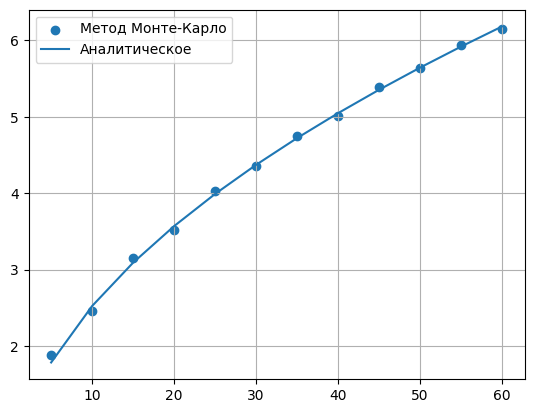

In [21]:
import matplotlib.pyplot as plt

steps_list = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
dist_list = np.zeros(len(T1))
iterations = 200000

for i, step in enumerate(steps_list):
    dist_list[i] = random_walk_mean(step, iterations)

plt.scatter(T1, dists, label="Метод Монте-Карло")
plt.plot(T1, np.sqrt(T1*2/np.pi), label="Аналитическое")
plt.legend()
plt.grid()
plt.show()

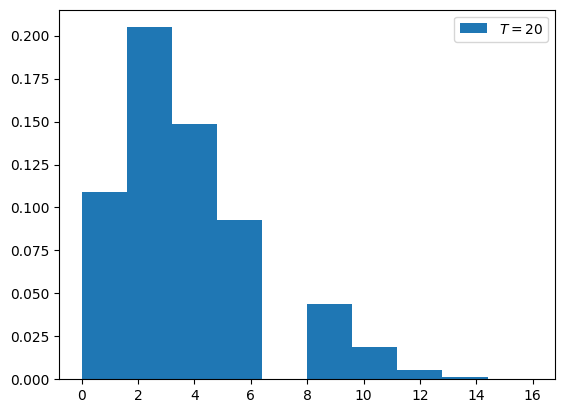

In [60]:
iterations = 10000
steps = 20
dist_list = np.zeros(iterations)
for i in range(iterations):
    dist_list[i] = random_walk(steps)
    
plt.hist(dist_list, density=True, label=f"$T = {steps}$")

plt.legend()
plt.show()


# Задание 4

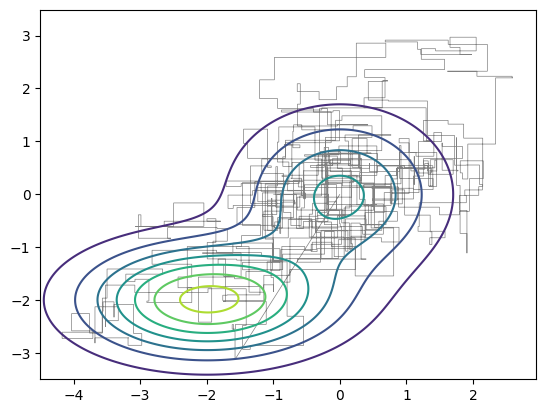

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.mlab as mlab
import scipy
import scipy.stats as stats


delta = 0.01
X, Y = np.meshgrid(np.arange(-4.5, 2.0, delta), np.arange(-3.5, 3.5, delta))

z1 = stats.multivariate_normal([0,0],[[1.0,0],[0,1.0]])
z2 = stats.multivariate_normal([-2,-2],[[1.5,0],[0,0.5]])

def z(x): 
    return 0.4*z1.pdf(x) + 0.6*z2.pdf(x)

Q = stats.norm(0, 0.4)
r = [-1.,0]
N = 1000

samples = np.zeros((N+1, 2))
samples[0] = r
count = 0
for i in range(N//2):
    for j in range(2):
        rq = r.copy()
        rq[j] += Q.rvs()
        a = z(rq)/z(r) 
        if np.random.binomial(1, min(a,1),1)[0] == 1:
            count +=1
            r = rq.copy()
            samples[count] = r.copy()
      
codes = np.ones(len(samples), int) * path.Path.LINETO
codes[0] = path.Path.MOVETO
p = path.Path(samples,codes)


Z01 = scipy.stats.multivariate_normal([0, 0], [[1.0, 0.0], [0.0, 1.0]])
Z1 = Z01.pdf(np.dstack((X, Y)))

Z02 = scipy.stats.multivariate_normal([-2, -2], [[1.5, 0], [0, 0.5]])
Z2 = Z02.pdf(np.dstack((X, Y)))

Z = 0.4*Z1 + 0.6*Z2


fig, ax = plt.subplots()
ax.contour(X, Y, Z)
ax.add_patch(patches.PathPatch(p, facecolor='none', lw=0.5, edgecolor='gray'))
plt.show()

# Задание 5

rejected candidates: 0.39086


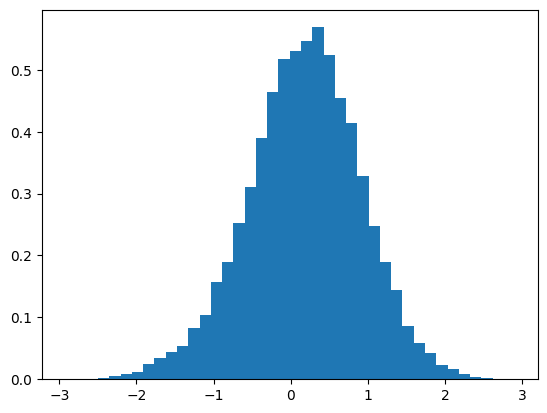

In [67]:
import scipy.integrate as integrate

def pi(x):
    return np.exp(-x**2)*(3+np.cos(x)+2*np.sin(x)+x**2)

const = integrate.quad(pi, -np.inf, +np.inf)[0]

def pdf(x):
    return pi(x)/const


x = 0.1 
N = 50000
xs = np.zeros(N)
xs[0] = x
reject = 0


for i in range(1, N):
    x_cand = xs[i-1] + np.random.normal(loc=0, scale=1)
    
    if pdf(x_cand)/pdf(xs[i-1]) >= 1:
        xs[i] = x_cand
        continue
    else:
        if np.random.uniform(0, 1) < pdf(x_cand)/pdf(xs[i-1]):
            xs[i] = x_cand
            continue
        else:
            xs[i] = xs[i-1]
            reject  += 1
            continue


plt.hist(xs, bins = 40, density=True)
print(f"rejected candidates: {reject/N}")